In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook"

In [19]:
# Import Data set
df = pd.read_csv('/Users/peter/DataSets/steamgames.csv')

In [43]:
# Inspect Data types
# Inspect missing data values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   app_id              50872 non-null  int64  
 1   title               50872 non-null  object 
 2   date_release        50872 non-null  object 
 3   win                 50872 non-null  bool   
 4   mac                 50872 non-null  bool   
 5   linux               50872 non-null  bool   
 6   rating              50872 non-null  object 
 7   positive_ratio      50872 non-null  int64  
 8   user_reviews        50872 non-null  int64  
 9   price_final         50872 non-null  float64
 10  price_original      50872 non-null  float64
 11  discount            50872 non-null  float64
 12  steam_deck          50872 non-null  bool   
 13  release_year_bin    50872 non-null  int64  
 14  price_bin           50872 non-null  int64  
 15  positive_ratio_bin  50872 non-null  int64  
dtypes: b

In [42]:
# Aquire row count, column count
df.shape

(50872, 16)

In [6]:
# Display first 3 rows
df.head(3)

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True


In [7]:
# Display last 3 rows
df.tail(3)

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
50869,1402110,Eternights,2023-09-11,True,False,False,Very Positive,89,1128,30.0,0.0,0.0,True
50870,2272250,Forgive Me Father 2,2023-10-19,True,False,False,Very Positive,95,82,17.0,0.0,0.0,True
50871,2488510,FatalZone,2023-10-23,True,False,False,Very Positive,88,144,4.0,0.0,0.0,True


In [9]:
# Aquire unique title counts
uv = df['title'].unique()
uv.shape

(50751,)

In [44]:
# Aquire unique rating labels
rv = df['rating'].unique()
rv.shape

(9,)

In [11]:
# Aquire sum of all user reviews
total_reviews = df['user_reviews'].sum()
int(total_reviews)

92812148

In [46]:
# Inspect null values
df.isnull().sum()


app_id                0
title                 0
date_release          0
win                   0
mac                   0
linux                 0
rating                0
positive_ratio        0
user_reviews          0
price_final           0
price_original        0
discount              0
steam_deck            0
release_year_bin      0
price_bin             0
positive_ratio_bin    0
dtype: int64

In [58]:
# Aquire analysis about user reviews
reviews = df['user_reviews']
# date.head()
int(reviews.median())

49

In [60]:
df.describe().round(2)

,app_id,positive_ratio,user_reviews,price_final,price_original,discount,release_year_bin,price_bin,positive_ratio_bin
count,50872.00,50872.00,50872.00,50872.00,50872.00,50872.00,50872.00,50872.00,50872.00
mean,1055223.81,77.05,1824.42,8.62,8.73,5.59,3.63,0.00,2.50
std,610324.95,18.25,40073.52,11.51,11.51,18.61,0.57,0.06,0.71
min,10.00,0.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,528737.50,67.00,19.00,0.99,0.99,0.00,3.00,0.00,2.00
50%,986085.00,81.00,49.00,4.99,4.99,0.00,4.00,0.00,3.00
75%,1524895.00,91.00,206.00,10.99,11.99,0.00,4.00,0.00,3.00
max,2599300.00,100.00,7494460.00,299.99,299.99,90.00,4.00,3.00,3.00


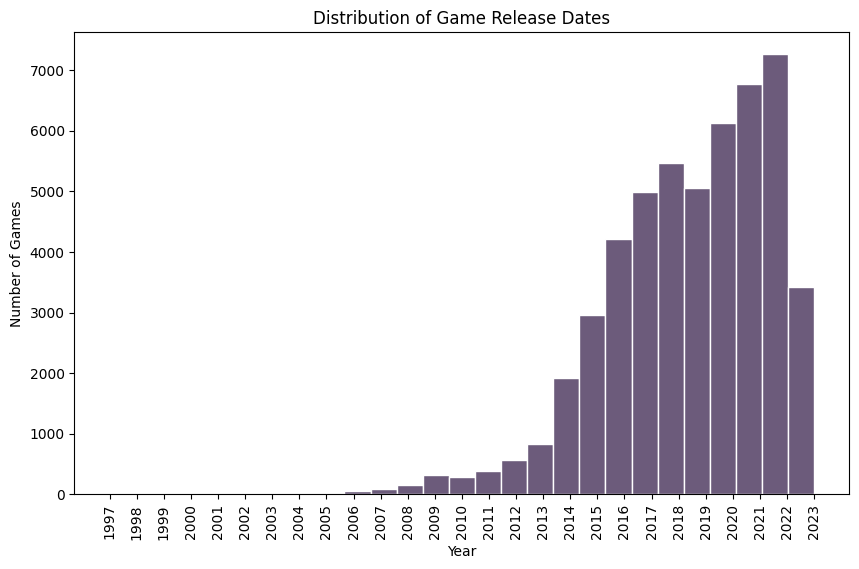

In [74]:
# Convert date_release to datetime
df['date_release'] = pd.to_datetime(df['date_release'])

# Plot the release date distribution
plt.figure(figsize=(10, 6))
bar_color = '#6C5B7B'  # Specify the hex color here
df['date_release'].dt.year.hist(bins=df['date_release'].dt.year.nunique(), edgecolor='white', color=bar_color)

# Set the x-axis ticks to show every year and rotate the labels
plt.xticks(df['date_release'].dt.year.unique(), rotation=90)

# Turn off the grid
plt.grid(False)

plt.title('Distribution of Game Release Dates')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.show()

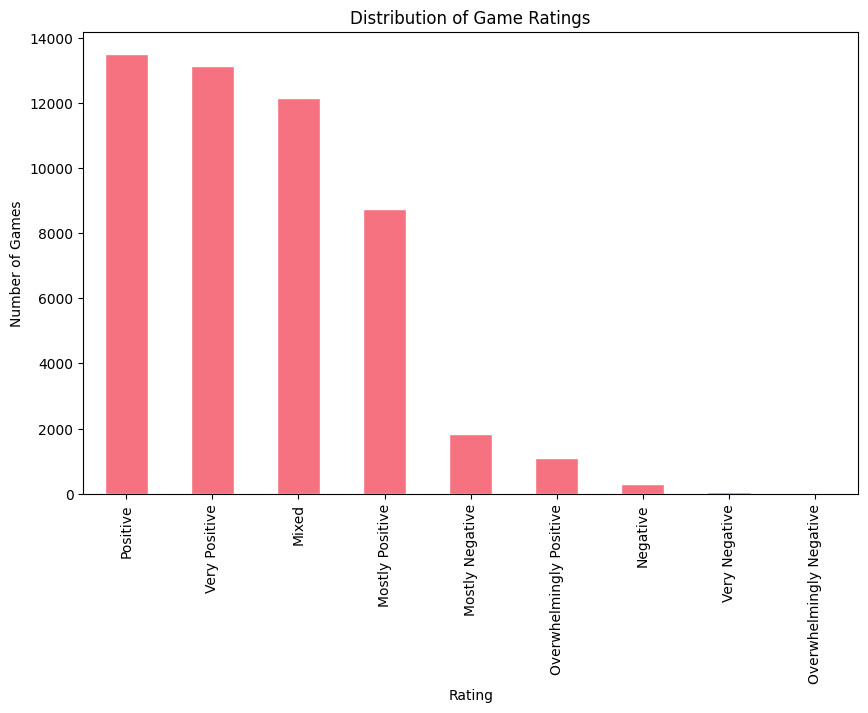

In [75]:
# Plot the rating distribution
plt.figure(figsize=(10, 6))
bar_color = '#F67280'  # Specify the hex color here
df['rating'].value_counts().plot(kind='bar', color=bar_color, edgecolor='white')

plt.title('Distribution of Game Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Games')
plt.show()

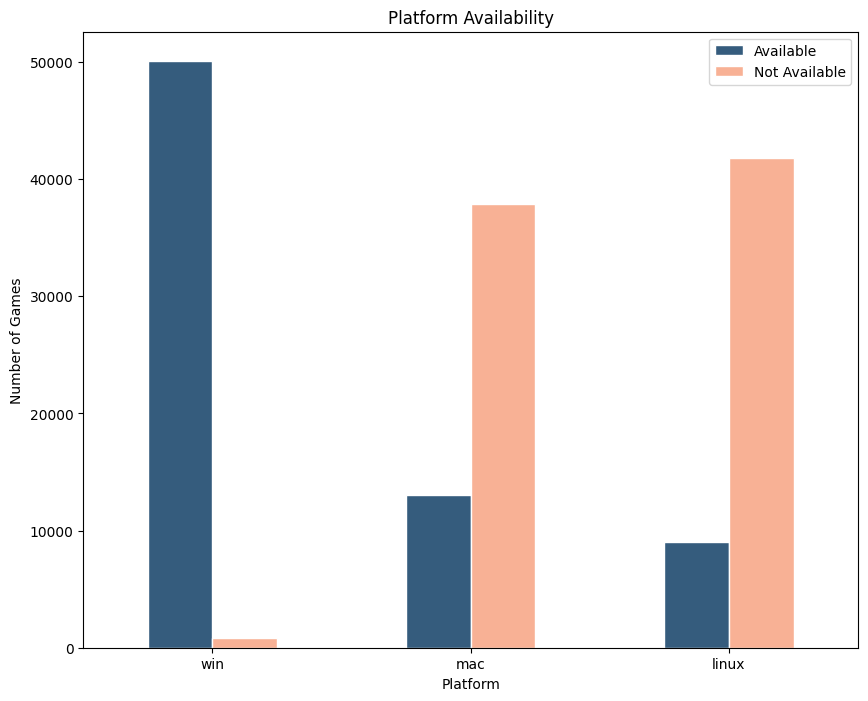

In [89]:
# Calculate platform availability
platform_counts = df[['win', 'mac', 'linux']].apply(pd.Series.value_counts).T
platform_counts = platform_counts.fillna(0).astype(int)

# Rename the columns to custom labels
platform_counts.columns = ['Not Available', 'Available']

# Ensure the bars are in the correct order
platform_counts = platform_counts[['Available', 'Not Available']]

# Set the figure size
fig_size = (10,8)  # Specify the desired figure size here (width, height)

# Create a figure and axis with the specified size
fig, ax = plt.subplots(figsize=fig_size)

# Plot platform availability
bar_color_available = '#355C7D'  # Hex color for 'Available'
bar_color_not_available = '#F8B195'  # Hex color for 'Not Available'
platform_counts.plot(kind='bar', color=[bar_color_available, bar_color_not_available], edgecolor='white', ax=ax)

# Customize the plot
ax.set_title('Platform Availability')
ax.set_xlabel('Platform')
ax.set_ylabel('Number of Games')
ax.set_xticklabels(platform_counts.index, rotation=0)
plt.show()

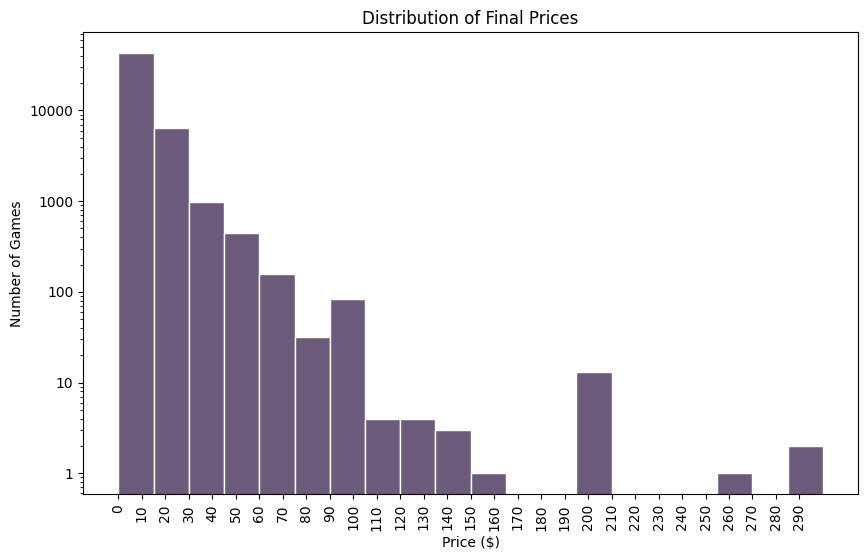

In [96]:
# Chart the price range

# Set the figure size
fig_size = (10, 6)  # Specify the desired figure size here (width, height)

# Create a figure and axis with the specified size
fig, ax = plt.subplots(figsize=fig_size)

# Plot the price distribution
bar_color = '#6c5b7b'  # Hex color for bars
df['price_final'].hist(bins=20, color=bar_color, edgecolor='white', ax=ax)

# Customize the plot
ax.set_title('Distribution of Final Prices')
ax.set_xlabel('Price ($)')
ax.set_ylabel('Number of Games')

# Set y-axis to logarithmic scale
ax.set_yscale('log')

# Turn off the grid
ax.grid(False)

# Add more ticks on the x-axis and rotate the labels
ax.set_xticks(range(0, int(df['price_final'].max()) + 1, 10))  # Adjust the step as needed
ax.set_xticklabels(ax.get_xticks(), rotation=90)

# Define custom y-axis ticks based on actual range of games
y_ticks = [1, 10, 100, 1000, 10000]  # Define a range for the y-axis ticks
ax.set_yticks(y_ticks)
ax.get_yaxis().set_major_formatter(plt.ScalarFormatter())

plt.show()

In [99]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import interact, Dropdown

# Load the dataset
file_path = '/Users/peter/DataSets/steamgames.csv'
df = pd.read_csv(file_path)

# Replace zero values in user_reviews with a small number
df['user_reviews'] = df['user_reviews'].replace(0, 0.1)

# Define the interactive plot function
def plot_graph(cmap_name='viridis', scale='log', marker_shape='circle'):
    fig = px.scatter(df, 
                     x='positive_ratio', 
                     y='user_reviews', 
                     color='positive_ratio', 
                     color_continuous_scale=cmap_name,
                     hover_name='title', 
                     log_y=(scale == 'log'),
                     labels={'positive_ratio':'Positive Ratio', 'user_reviews':'Number of User Reviews'},
                     title='Positive Ratio vs. User Reviews')

    # Update marker shapes
    if marker_shape == 'circle':
        marker_symbol = 'circle'
    elif marker_shape == 'square':
        marker_symbol = 'square'
    elif marker_shape == 'triangle':
        marker_symbol = 'triangle-up'
    else:
        marker_symbol = 'circle'

    fig.update_traces(marker=dict(symbol=marker_symbol), selector=dict(mode='markers'))

    # Show the plot
    fig.show()

# Create interactive widgets
cmap_widget = Dropdown(
    options=[('Viridis', 'viridis'), ('Plasma', 'plasma'), ('Inferno', 'inferno')],
    value='viridis',
    description='Colormap:',
)

scale_widget = Dropdown(
    options=[('Log Scale', 'log'), ('Linear Scale', 'linear')],
    value='log',
    description='Scale:',
)

marker_widget = Dropdown(
    options=[('Circle', 'circle'), ('Square', 'square'), ('Triangle', 'triangle')],
    value='circle',
    description='Marker Shape:',
)

# Use interactive function
interact(plot_graph, cmap_name=cmap_widget, scale=scale_widget, marker_shape=marker_widget)


interactive(children=(Dropdown(description='Colormap:', options=(('Viridis', 'viridis'), ('Plasma', 'plasma'),…

<function __main__.plot_graph(cmap_name='viridis', scale='log', marker_shape='circle')>

In [97]:
# Compare price final with user reviews

import pandas as pd
import plotly.express as px
import plotly.io as pio
from ipywidgets import interact, Dropdown, Checkbox

# Load the dataset
file_path = '/Users/peter/DataSets/steamgames.csv'
df = pd.read_csv(file_path)

# Replace zero values in user_reviews with a small number
df['user_reviews'] = df['user_reviews'].replace(0, 0.1)

# Ensure numeric columns are in the right format for plotting
df['positive_ratio'] = df['positive_ratio'].astype(float)
df['price_final'] = df['price_final'].astype(float)
df['rating_numeric'] = df['rating'].map({
    'Very Positive': 4.5,
    'Positive': 4.0,
    'Mostly Positive': 3.5,
    'Mixed': 3.0,
    'Mostly Negative': 2.5,
    'Negative': 2.0,
    'Very Negative': 1.0
}).fillna(0)

# Define qualitative colors with up to 9 distinct colors
qualitative_colors = px.colors.qualitative.Plotly[:9]

# Define the interactive plot function
def plot_graph(x_axis='positive_ratio', y_axis='user_reviews', color_by='rating_numeric', log_scale=True, size_by_value=None, marker_shape='circle', use_qualitative_colors=False):
    # Choose color scale
    color_scale = qualitative_colors if use_qualitative_colors and color_by in df.select_dtypes(include=['object']).columns else 'viridis'
    
    # Create the scatter plot
    fig = px.scatter(df, 
                     x=x_axis, 
                     y=y_axis, 
                     color=color_by, 
                     color_continuous_scale=color_scale if not use_qualitative_colors else color_scale,
                     hover_name='title', 
                     log_y=log_scale,
                     labels={x_axis: x_axis.replace('_', ' ').title(), y_axis: y_axis.replace('_', ' ').title()},
                     title=f'Scatter Plot: {x_axis.replace("_", " ").title()} vs. {y_axis.replace("_", " ").title()}')

    # Update marker shapes
    marker_symbol = {
        'circle': 'circle',
        'square': 'square',
        'triangle': 'triangle-up'
    }.get(marker_shape, 'circle')

    # Size of markers
    marker_size = df[size_by_value] if size_by_value else 8

    fig.update_traces(marker=dict(symbol=marker_symbol, size=marker_size), selector=dict(mode='markers'))

    # Add colorbar manually for continuous color scales
    if not use_qualitative_colors:
        fig.update_layout(coloraxis_colorbar=dict(title=color_by))

    # Show the plot using plotly.io
    pio.renderers.default = 'iframe'
    pio.show(fig)

# Create interactive widgets
x_axis_widget = Dropdown(
    options=[
        ('Positive Ratio', 'positive_ratio'), 
        ('User Reviews', 'user_reviews'), 
        ('Price Final', 'price_final'), 
        ('Rating', 'rating_numeric')
    ],
    value='positive_ratio',
    description='X Axis:',
)

y_axis_widget = Dropdown(
    options=[
        ('Positive Ratio', 'positive_ratio'), 
        ('User Reviews', 'user_reviews'), 
        ('Price Final', 'price_final'), 
        ('Rating', 'rating_numeric')
    ],
    value='user_reviews',
    description='Y Axis:',
)

color_by_widget = Dropdown(
    options=[
        ('Rating', 'rating_numeric'), 
        ('Positive Ratio', 'positive_ratio'), 
        ('User Reviews', 'user_reviews'), 
        ('Price Final', 'price_final')
    ],
    value='rating_numeric',
    description='Color By:',
)

log_scale_widget = Checkbox(
    value=True,
    description='Log Scale'
)

size_by_value_widget = Dropdown(
    options=[('None', None), ('Positive Ratio', 'positive_ratio'), ('Price Final', 'price_final'), ('User Reviews', 'user_reviews')],
    value=None,
    description='Size By Value'
)

marker_widget = Dropdown(
    options=[('Circle', 'circle'), ('Square', 'square'), ('Triangle', 'triangle')],
    value='circle',
    description='Marker Shape:',
)

qualitative_color_widget = Checkbox(
    value=False,
    description='Qualitative Colors'
)

# Use interactive function
interact(plot_graph, 
         x_axis=x_axis_widget, 
         y_axis=y_axis_widget,
         color_by=color_by_widget, 
         log_scale=log_scale_widget,
         size_by_value=size_by_value_widget,
         marker_shape=marker_widget,
         use_qualitative_colors=qualitative_color_widget)


interactive(children=(Dropdown(description='X Axis:', options=(('Positive Ratio', 'positive_ratio'), ('User Re…

<function __main__.plot_graph(x_axis='positive_ratio', y_axis='user_reviews', color_by='rating_numeric', log_scale=True, size_by_value=None, marker_shape='circle', use_qualitative_colors=False)>

In [98]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
from ipywidgets import interact, Dropdown, Checkbox

# Load the dataset
file_path = '/Users/peter/DataSets/steamgames.csv'
df = pd.read_csv(file_path)

# Replace zero values in user_reviews with a small number
df['user_reviews'] = df['user_reviews'].replace(0, 0.1)

# Ensure numeric columns are in the right format for plotting
df['positive_ratio'] = df['positive_ratio'].astype(float)
df['price_final'] = df['price_final'].astype(float)
df['rating_numeric'] = df['rating'].map({
    'Very Positive': 4.5,
    'Positive': 4.0,
    'Mostly Positive': 3.5,
    'Mixed': 3.0,
    'Mostly Negative': 2.5,
    'Negative': 2.0,
    'Very Negative': 1.0
}).fillna(0)

# Define color palettes
color_palettes = {
    'Viridis': 'viridis',
    'Cividis': 'cividis',
    'Plasma': 'plasma',
    'Inferno': 'inferno',
    'Qualitative': px.colors.qualitative.Plotly[:9]
}

# Define the interactive plot function
def plot_graph(x_axis='positive_ratio', y_axis='user_reviews', color_by='rating_numeric', log_scale=True, size_by_value='None', marker_shape='circle', color_palette='Viridis', opacity_by='None'):
    # Choose color scale
    color_scale = color_palettes[color_palette] if color_palette != 'Qualitative' else color_palettes['Qualitative']
    
    # Determine marker opacity
    if opacity_by != 'None':
        # Normalize opacity values to be between 0 and 1
        min_opacity = df[opacity_by].min()
        max_opacity = df[opacity_by].max()
        df['normalized_opacity'] = (df[opacity_by] - min_opacity) / (max_opacity - min_opacity)
        marker_opacity = df['normalized_opacity']
    else:
        marker_opacity = 1.0

    # Create the scatter plot
    fig = px.scatter(df, 
                     x=x_axis, 
                     y=y_axis, 
                     color=color_by, 
                     color_continuous_scale=color_scale if color_palette != 'Qualitative' else None,
                     color_discrete_sequence=color_scale if color_palette == 'Qualitative' else None,
                     hover_name='title', 
                     log_y=log_scale,
                     labels={x_axis: x_axis.replace('_', ' ').title(), y_axis: y_axis.replace('_', ' ').title()},
                     title=f'Scatter Plot: {x_axis.replace("_", " ").title()} vs. {y_axis.replace("_", " ").title()}')

    # Update marker shapes
    marker_symbol = {
        'circle': 'circle',
        'square': 'square',
        'triangle': 'triangle-up'
    }.get(marker_shape, 'circle')

    # Size of markers
    marker_size = df[size_by_value] if size_by_value != 'None' else 3

    fig.update_traces(marker=dict(symbol=marker_symbol, size=marker_size, opacity=marker_opacity), selector=dict(mode='markers'))

    # Add colorbar manually for continuous color scales
    if color_palette != 'Qualitative':
        fig.update_layout(coloraxis_colorbar=dict(title=color_by))

    # Show the plot using plotly.io
    pio.renderers.default = 'iframe'
    pio.show(fig)

# Create interactive widgets
columns = df.columns.tolist()

x_axis_widget = Dropdown(
    options=columns,
    value='positive_ratio',
    description='X Axis:',
)

y_axis_widget = Dropdown(
    options=columns,
    value='user_reviews',
    description='Y Axis:',
)

color_by_widget = Dropdown(
    options=columns,
    value='rating_numeric',
    description='Color By:',
)

log_scale_widget = Checkbox(
    value=True,
    description='Log Scale'
)

size_by_value_widget = Dropdown(
    options=['None'] + columns,
    value='None',
    description='Size By Value'
)

marker_widget = Dropdown(
    options=[('Circle', 'circle'), ('Square', 'square'), ('Triangle', 'triangle')],
    value='circle',
    description='Marker Shape:',
)

color_palette_widget = Dropdown(
    options=list(color_palettes.keys()),
    value='Viridis',
    description='Color Palette:'
)

opacity_by_widget = Dropdown(
    options=['None'] + columns,
    value='None',
    description='Opacity By:'
)

# Use interactive function
interact(plot_graph, 
         x_axis=x_axis_widget, 
         y_axis=y_axis_widget,
         color_by=color_by_widget, 
         log_scale=log_scale_widget,
         size_by_value=size_by_value_widget,
         marker_shape=marker_widget,
         color_palette=color_palette_widget,
         opacity_by=opacity_by_widget)


interactive(children=(Dropdown(description='X Axis:', index=7, options=('app_id', 'title', 'date_release', 'wi…

<function __main__.plot_graph(x_axis='positive_ratio', y_axis='user_reviews', color_by='rating_numeric', log_scale=True, size_by_value='None', marker_shape='circle', color_palette='Viridis', opacity_by='None')>

In [34]:
import pandas as pd
import plotly.graph_objects as go
from ipywidgets import interact, IntSlider, Dropdown
import numpy as np
import plotly.colors as pc

# Load the dataset
file_path = '/Users/peter/DataSets/steamgames.csv'
df = pd.read_csv(file_path)

# Ensure numeric columns are in the right format
df['positive_ratio'] = df['positive_ratio'].astype(float)
df['price_final'] = df['price_final'].astype(float)

# Preprocess data for Sankey diagram
def prepare_sankey_data(df, year_bins, price_bins, ratio_bins):
    # Create bins
    df['release_year_bin'] = pd.cut(df['date_release'].str[:4].astype(int), bins=year_bins, labels=False)
    df['price_bin'] = pd.cut(df['price_final'], bins=price_bins, labels=False)
    df['positive_ratio_bin'] = pd.cut(df['positive_ratio'], bins=ratio_bins, labels=False)
    
    # Define bin ranges
    release_year_ranges = pd.cut(df['date_release'].str[:4].astype(int), bins=year_bins).cat.categories
    price_ranges = pd.cut(df['price_final'], bins=price_bins).cat.categories
    ratio_ranges = pd.cut(df['positive_ratio'], bins=ratio_bins).cat.categories
    
    # Define node names
    release_year_nodes = [f'Year: {str(range.left)}-{str(range.right)}' for range in release_year_ranges]
    os_nodes = ['Windows', 'Mac', 'Linux']
    price_nodes = [f'Price: ${round(range.left, 2)}-${round(range.right, 2)}' for range in price_ranges]
    positive_ratio_nodes = [f'Ratio: {round(range.left, 2)}-{round(range.right, 2)}' for range in ratio_ranges]
    
    # Prepare mappings
    release_year_mapping = {node: i for i, node in enumerate(release_year_nodes)}
    os_mapping = {os: i + len(release_year_nodes) for i, os in enumerate(os_nodes)}
    price_mapping = {node: i + len(release_year_nodes) + len(os_nodes) for i, node in enumerate(price_nodes)}
    positive_ratio_mapping = {node: i + len(release_year_nodes) + len(os_nodes) + len(price_nodes) for i, node in enumerate(positive_ratio_nodes)}
    
    # Aggregate data
    aggregated_data = df.groupby(['release_year_bin', 'win', 'mac', 'linux', 'price_bin', 'positive_ratio_bin'])['user_reviews'].sum().reset_index()
    
    # Create links
    links = []
    
    for _, row in aggregated_data.iterrows():
        release_node = f'Year: {str(release_year_ranges[row["release_year_bin"]].left)}-{str(release_year_ranges[row["release_year_bin"]].right)}'
        os_node = row['win'] and 'Windows' or row['mac'] and 'Mac' or 'Linux'
        price_node = f'Price: ${round(price_ranges[row["price_bin"]].left, 2)}-${round(price_ranges[row["price_bin"]].right, 2)}'
        positive_ratio_node = f'Ratio: {round(ratio_ranges[row["positive_ratio_bin"]].left, 2)}-{round(ratio_ranges[row["positive_ratio_bin"]].right, 2)}'
        
        links.append({
            'source': release_year_mapping[release_node],
            'target': os_mapping[os_node],
            'value': row['user_reviews']
        })
        links.append({
            'source': os_mapping[os_node],
            'target': price_mapping[price_node],
            'value': row['user_reviews']
        })
        links.append({
            'source': price_mapping[price_node],
            'target': positive_ratio_mapping[positive_ratio_node],
            'value': row['user_reviews']
        })
    
    # Flatten links and nodes
    all_nodes = release_year_nodes + os_nodes + price_nodes + positive_ratio_nodes
    sources = [link['source'] for link in links]
    targets = [link['target'] for link in links]
    values = [link['value'] for link in links]
    
    return all_nodes, sources, targets, values

# Define the interactive plot function
def plot_sankey(year_bins=5, price_bins=5, ratio_bins=5, color_scale='Viridis', bar_intensity=1):
    all_nodes, sources, targets, values = prepare_sankey_data(df, year_bins, price_bins, ratio_bins)
    
    # Normalize flow values for color mapping
    min_value, max_value = min(values), max(values)
    normalized_values = [(value - min_value) / (max_value - min_value) for value in values]
    
    # Define a color scale
    colors = pc.sequential.__getattribute__(color_scale)
    
    # Map normalized values to colors
    color_map = [colors[int(value * (len(colors) - 1))] for value in normalized_values]
    
    fig = go.Figure(go.Sankey(
        node=dict(
            pad=15,
            thickness=20 * bar_intensity,  # Adjust thickness based on bar intensity
            line=dict(color="black", width=0.5),
            label=all_nodes,
            color='rgba(31, 119, 180, 0.8)'  # Default node color
        ),
        link=dict(
            source=sources,
            target=targets,
            value=values,
            color=color_map
        )
    ))

    fig.update_layout(title_text=f'Sankey Diagram', font_size=10)
    fig.show()

# Create interactive widgets
year_bins_widget = IntSlider(
    value=5,
    min=2,
    max=20,
    step=1,
    description='Year Bins:',
    continuous_update=False
)

price_bins_widget = IntSlider(
    value=5,
    min=2,
    max=10,
    step=1,
    description='Price Bins:',
    continuous_update=False
)

ratio_bins_widget = IntSlider(
    value=5,
    min=2,
    max=10,
    step=1,
    description='Ratio Bins:',
    continuous_update=False
)

color_scale_widget = Dropdown(
    options=[name for name in dir(pc.sequential) if not name.startswith('__')],
    value='Viridis',
    description='Color Scale:',
    continuous_update=False
)

bar_intensity_widget = IntSlider(
    value=1,
    min=0.5,
    max=2,
    step=0.1,
    description='Bar Intensity:',
    continuous_update=False
)

# Use interactive function
interact(plot_sankey, 
         year_bins=year_bins_widget, 
         price_bins=price_bins_widget,
         ratio_bins=ratio_bins_widget,
         color_scale=color_scale_widget,
         bar_intensity=bar_intensity_widget)


interactive(children=(IntSlider(value=5, continuous_update=False, description='Year Bins:', max=20, min=2), In…

<function __main__.plot_sankey(year_bins=5, price_bins=5, ratio_bins=5, color_scale='Viridis', bar_intensity=1)>